<h1 style="text-align: center; color: purple;" markdown="1">Econ 320 Python Lab Regression Analysis and Qualitative Regressors </h1>
<h2 style="text-align: center; color: purple;" markdown="1">Handout 9</h2>

Many variables of interest are qualitative rather than quantitative. Gender, race, marital status, level of education, ocupation, region, etc. Qualitative information is ussualy represented in regressions as binary or dummy variables which can only take a value zero or one. 

**The set up**

In [1]:
import wooldridge as woo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

## Dummy variables 

Dummy variables can be used as regressors just as any other variables. The coefficient of a single dummy variable added to regression represents the difference in the intercepet between groups, see Wooldridge (2019, Section 7.2)

Let's use an example in which we want to estimate a wage equation, and investigate what are the wage differences by gender. Once we have generated the dummy variable we just need to include it in our regression formula. 

We will use our wage1 dataset from Wooldridge. First we want to check how is our variable of interest distributed. The gender variable in this dataset can be found in the variable female. A dummy variable that takes the value of 1 if the individual is female and 0 if male. 

We are going to use the function `pd.crosstab(index=variable, columns=column names)` to see the distribution of gender in our data, this will create a frequency table with the number of women and men in the sample.

In [2]:
# load wage1 data from wooldridge package
wage1 = woo.dataWoo('wage1')
wage1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

In [3]:
# Name the count column
# Crosstab to see how many women we have. 
pd.crosstab(index = wage1['female'],
           columns = "count")

col_0,count
female,
0,274
1,252


We are interested in the wage differences by gender. The regression equation will be the following formula

Model 1 $$log(wage) = \beta_0 + \beta_1*female + \beta_2*educ + \beta_3*exper + \beta_4*tenure$$
Model 2 & 3 Restrict the data only for men and only for women $$log(wage) = \beta_0 + \beta_1*female + \beta_2*educ + \beta_3*exper + \beta_4*tenure$$

Model 4 Interact education, experience and tenure with female 

$$log(wage) = \beta_0 + \beta_1*female + \beta_2*educ(female==0) + \beta_3*exper(female==0) + \\ \beta_4*tenure(female==0) + \beta_5*educ(female==1) + \beta_6*exper(female==1) + \beta_7*tenure(female==1)$$

* A scatter plot with regression lines by gender will provide you with a good graphical representation of what you are trying to estimate in your regression. Now in applied research sometimes, or often this might not be as obvious as it is here but the plot can be very iluminating. We are going to do it wit education and wages by gender. 
* Run the regression that estimates the equation for the first model
* We will then run the other three models. 

> CAVEAT: these three models are run for pedagogical purposes. You dont need to do this for every dummy in a regression. But this allows me to ilustrate the impact of a dummy variable. 

In [4]:
m1 = smf.ols(formula='lwage ~ female +educ + exper +tenure', data=wage1)
m1 = m1.fit()
# print regression table:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     84.07
Date:                  周五, 28 3月 2025   Prob (F-statistic):           4.68e-55
Time:                        13:07:38   Log-Likelihood:                -282.46
No. Observations:                 526   AIC:                             574.9
Df Residuals:                     521   BIC:                             596.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5013      0.102      4.920      0.000       0.301       0.702
female        -0.3011      0.037     -8.085      0.000      -0.374      -0.228
educ           0.0875      0.007     12.605      0.000       0.074       0.101
exper          0.0046      0.002      2.845      0.005       0.001       0.008
tenure         0.0174      0.003      5.835      0.000       0.012       0.023
==============================================================================
Omnibus:                       12.037   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               22.360
Skew:                           0.012   Prob(JB):                     1.40e-05
Kurtosis:                       4.010   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 1000x800 with 0 Axes>

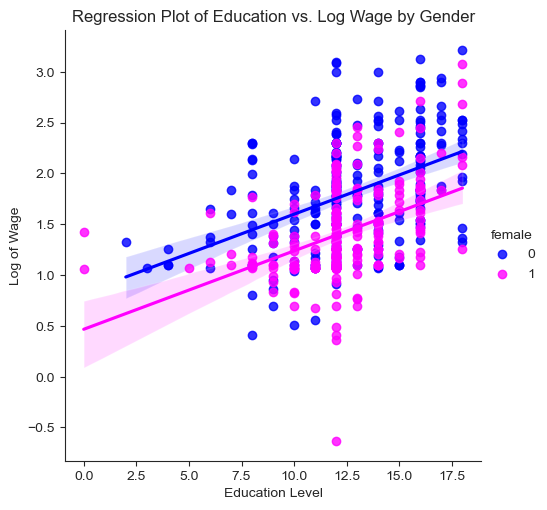

In [5]:
# lmplot of educ and log(wage) with regression line by gender 
# and 95% confidence interval for the regression line
# use the seaborn package
sns.set_style("ticks");  # Optional, sets the style of the plot
plt.figure(figsize=(10, 8));  # Optional, set the figure size

sns.lmplot(x="educ", y="lwage", data=wage1, hue="female", palette={0: "blue", 1: "magenta"});

# Set labels and title
plt.xlabel("Education Level");
plt.ylabel("Log of Wage");
plt.title("Regression Plot of Education vs. Log Wage by Gender");

# Show the plot
plt.show();

In [6]:
# You can also filter your data and create two separate equations but the most efficient way is to add the subset option inside the lm command data=subset()

m2 = smf.ols(formula = 'lwage ~  educ + exper + tenure', data = wage1, 
             subset=(wage1['female']==0)).fit()
#You need to interact each regressor with the female variable for the models to be the same 
# when you restrict the sample do it below in model m3
m3 = smf.ols(formula = 'lwage ~  educ + exper +tenure', data = wage1 , 
             subset=(wage1['female']==1)).fit()

m4 = smf.ols(formula = 'lwage ~ female +educ*female + exper*female +tenure*female', 
             data = wage1).fit()

# Put these models in stargazer table with the intercept at the bottom see the table 
# print regression table:

models = Stargazer([m1, m2, m3, m4])
models.title('Regression on Wages')
models.custom_columns(['All', 'Only men', 'Only women', 'Interaction'], [1, 1, 1, 1])
models.covariate_order(['Intercept', 'female' , 'educ' , 'exper', 'tenure', 'educ:female', 'exper:female','tenure:female'])
HTML(models.render_html())


# Now, what can you say about the coefficients for the dummy variable female?

## Dummy variables and arithmetic formulas into a regression  

We can run another regression with the following formula 

$$log(wage) = \beta_0 + \beta_1*married + \beta_2*female + \beta_3*married*female + \beta_4*educ + \beta_5*exper + \beta_6*exper^2 + \beta_7*tenure + \beta_8*tenure^2$$

Notice how we are adding married and female dummy variables in the regression and also two squared variables into the regression 

These dummy variables are added as they are because they take 1 for category of interest and 0 for the other. 

When you want to add variables that are arithmetic operations of other variables instead of creating a separate variable you can add them just by using `I(formula)`

* Run the new regression that estimates the new equation with tenure and experience squared 
* Run another regression with an interaction term of female and education

In [7]:
reg = smf.ols(formula='np.log(wage) ~ married*female + educ + exper +'
              'I(exper**2) + tenure +I(tenure**2)', data=wage1)
results = reg.fit()
#results.summary()

reg1 = smf.ols(formula='np.log(wage) ~ married + educ + female + I(educ*female) + exper +'
              'I(exper**2) + tenure +I(tenure**2)', data=wage1)
results1 = reg1.fit()
#resulst.summary()

reg2 = smf.ols(formula='np.log(wage) ~ married + educ*female + exper +'
              'I(exper**2) + tenure +I(tenure**2)', data=wage1)
results2 = reg2.fit()
#resulst.summary() 

model4 = Stargazer([results, results1, results2])
model4.covariate_order(['Intercept','female' , 'educ' , 'exper', 'tenure', 'married',
                        'married:female' , 'educ:female', 'I(exper ** 2)', 'I(tenure ** 2)', 'I(educ * female)'])
HTML(model4.render_html())

# The other option use only the interaction, there is no need to include the variables alone Python does it. 

## Function to create dummies 

Another way of creating a dummy variable is defining a function see below:

```{
    def f(x):
    if 'criteria for x':
        return 1
    else: 
        return 0

 data['newdummy']=data['vartochange'].apply(f)
 
 ```

In [ ]:
# define function dummy
# Define criteria, return 1 , else return 0

   

wage1["HS"] = 
wage1[["educ", "HS"]].value_counts(dropna=False)



## Boolean Variables

To store qualitative yes or no information Python uses **Boolean variables**. Instead of transforming boolean variables into 0/1 dummy variables tehy can be directly used as regressors in the output their coefficient is then named `varname[T.True]`. These variables are treated such that **TRUE=1** and **FALSE=0**.

Below we will take the femail dummy variable and recoded as a boolean variable and introduce it in the regression. See below. 


In [ ]:
display(wage1.numdep.value_counts())
# Create the boolean variable 
# Define a criteria in parenthesis and save that into a new variable
# In this case, has dependents 


## Regression with logical variable

In [ ]:
# regression with boolean variable:

m6 = smf.ols(formula='np.log(wage) ~ female + hasdep + educ + exper + tenure', data=wage1)
m6 = m6.fit()


m6s = Stargazer([m6])
m6s.covariate_order(['Intercept', "female", 'hasdep[T.True]' , 'educ' , 'exper', 'tenure'])
m6s.rename_covariates({'isfemale[T.True]': 'Female:True'})
HTML(m6s.render_html())


In [ ]:
!jupyter nbconvert --to html H10E_320Lab_Qualitative.ipynb

&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON320 Python Programming Laboratory</a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>

&nbsp;